In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for mapping colours to an array of values
from matplotlib.colors import ListedColormap  

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
#to make this notebook's output stable across runs
np.random.seed(42)

In [68]:
# Parameters
n_classes = 3
plot_colors = "rkb"
plot_step = 0.02

In [4]:
# load data
iris = load_iris()
X = iris.data[:,2:] #petal length and width
y = iris.target


In [13]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = tree_clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
 
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris-Setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
        if iris:
            plt.xlabel('Petal length', fontsize=14)
            plt.ylabel('Petal width', fontsize=14)
        else:
            plt.xlabel(r'$x_1$', fontsize=18)
            plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
                                       
        if legend:
            plt.legend(loc='lower right', fontsize=14)

Text(4.05,0.5,'(Depth=2)')

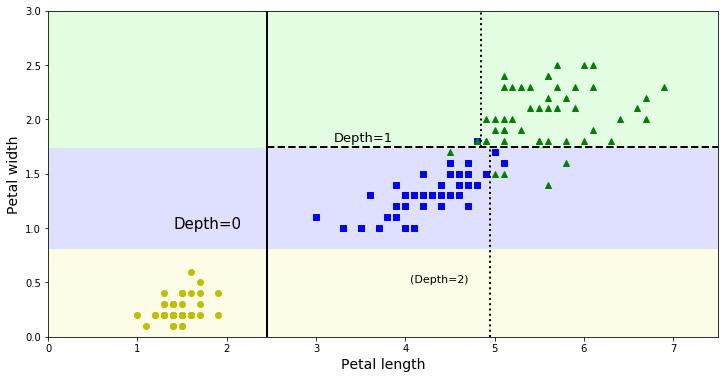

In [19]:
plt.figure(figsize=(12, 6))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3],       'k-',   linewidth=2)
plt.plot([2.45, 7.5],  [1.75, 1.75], 'k--',   linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75],    'k:',   linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3],    'k:',   linewidth=2)

plt.text(1.40, 1.0,  'Depth=0',   fontsize=15)
plt.text(3.2,  1.80, 'Depth=1',   fontsize=13)
plt.text(4.05, 0.5,  '(Depth=2)', fontsize=11)

- The thick vertical line represents the decision boundary for depth level 0, where the node is pure. 
- Due to being a pure node, it cannot be split further hence the algorithm goes on to analysing and splitting the unpure area on the right where the petal width is equal to 1.75 cm (dashed line). 

- Remember that in the beginning we set the stop splitting condition (number of depth level) equal to 2 (tree_clf = DecisionTreeClassifier(max_depth = 2)), which means our algorithm stops here.